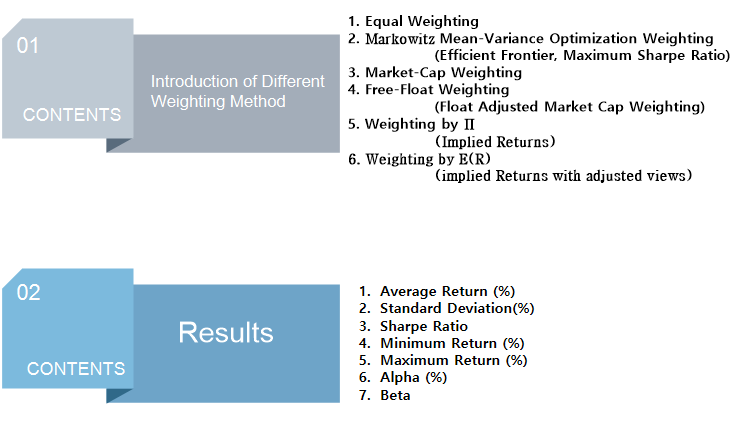

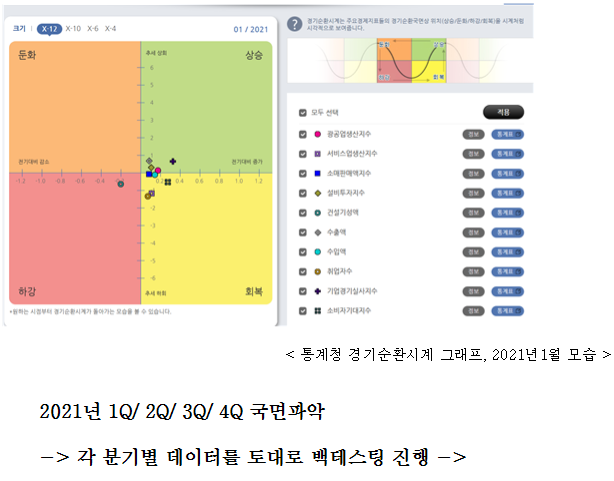

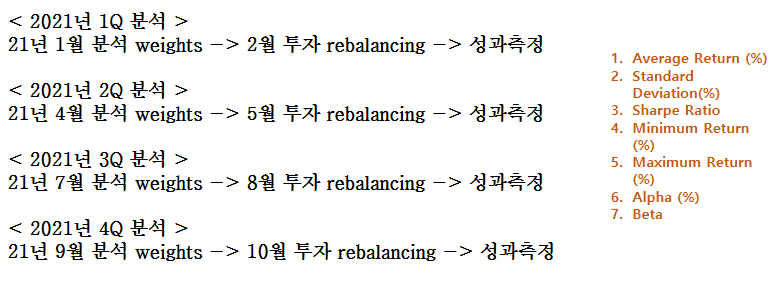

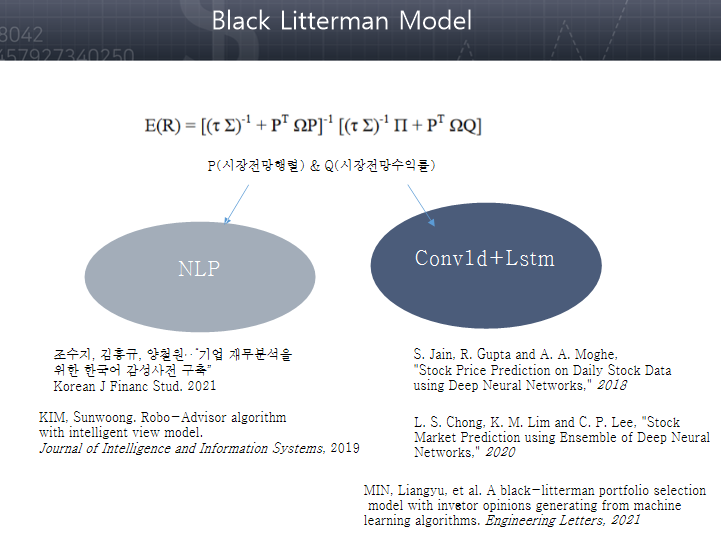

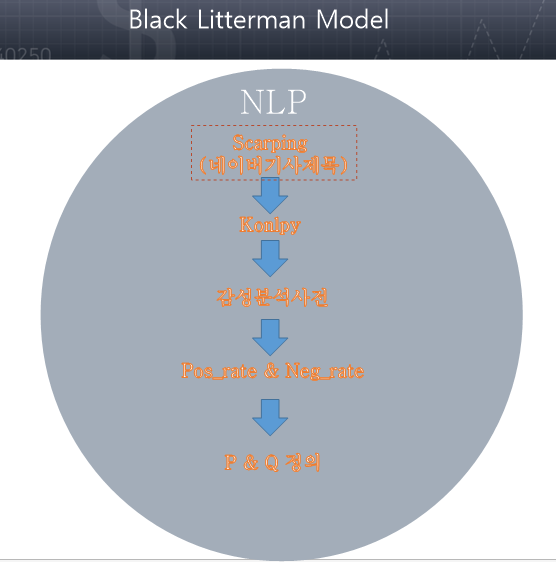

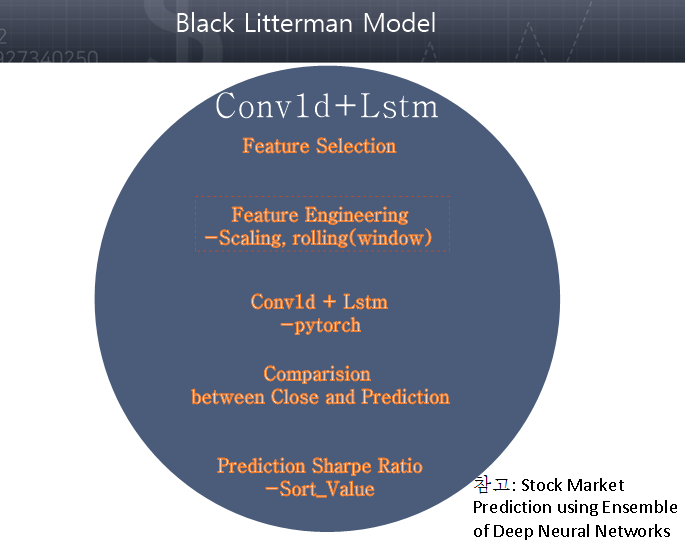

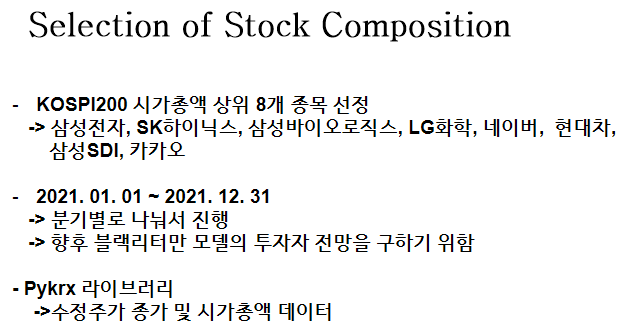


# Loading Stock Data

In [ ]:
!pip install pykrx

In [ ]:
import pandas as pd
import numpy as np
import os

from pykrx import stock 
import datetime

import warnings
warnings.filterwarnings(action='ignore')

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

mpl.rc('font', family='Malgun Gothic')
mpl.__version__


In [ ]:
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)


In [ ]:
start = '20210101'
end = '20211231'
year = 1 

stock_names = ['Samsung', 'SkHynix', 'Samsung Bio', 'LG Chemical', 'NAVER', 'Hyundai Car', 'Samsung SDI', 'KAKAO' ]
stock_codes = ['005930', '000660', '207940', '051910', '035420', '005380', '006400', '035720']

list = []
for code in stock_codes:

    Close= stock.get_market_ohlcv_by_date(start, end, code)
    list.append(pd.DataFrame(Close['종가']))

Close_df = pd.concat(list, axis=1)
Close_df.columns = [stock_names]
Close_df.head(10)

## Feature Engineering 

In [ ]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.font_manager as fm

# plt.rcParams['axes.unicode_minus'] = False
# font_path = '../input/nanumgothic/NanumGothic.ttf'
# font_name = fm.FontProperties(fname=font_path, size=10)#.get_name()
# matplotlib.rc('font', family=font_name.get_name())
%matplotlib inline

plt.figure(figsize=(25,25))
plt.rc('font', size=10)
plt.plot(Close_df['Samsung'], label='Samsung')
plt.plot(Close_df['SkHynix'], label='SkHynix')
plt.plot(Close_df['NAVER'], label='NAVER')
plt.plot(Close_df['LG Chemical'], label='LG Chemical')
plt.plot(Close_df['Samsung Bio'], label='Samsung Bio')
plt.plot(Close_df['Hyundai Car'], label='Hyundai Car')
plt.plot(Close_df['Samsung SDI'], label='Samsung SDI')
plt.plot(Close_df['KAKAO'], label='KAKAO')


plt.xlabel('Date')
plt.ylabel('Close')
plt.legend(fontsize='xx-large', loc='upper left',)
plt.grid(True)
plt.show()

In [ ]:
returns =Close_df.pct_change()

def get_returns_df (Close_df, start, end):
    
    returns = Close_df.pct_change()
    returns_Q = returns.loc[start:end] 
    
    return returns_Q

start_1Q_1 = '2021-01-04'
end_1Q_1 = '2021-01-31'


start_1Q_2 = '2021-02-01'
end_1Q_2 = '2021-02-28'


start_2Q_1 = '2021-04-01'
end_2Q_1 = '2021-04-30'

start_2Q_2 = '2021-05-01'
end_2Q_2 = '2021-05-31'


start_3Q_1 = '2021-07-01'
end_3Q_1 = '2021-07-31'

start_3Q_2 = '2021-08-01'
end_3Q_2 = '2021-08-30'

start_4Q_1 = '2021-10-01'
end_4Q_1 = '2021-10-31'

start_4Q_2 = '2021-11-01'
end_4Q_2 = '2021-11-30'



returns_1Q_1= get_returns_df(Close_df, start_1Q_1, end_2Q_1)
returns_2Q_1= get_returns_df(Close_df, start_2Q_1, end_2Q_1)
returns_3Q_1= get_returns_df(Close_df, start_3Q_1, end_3Q_1)
returns_4Q_1= get_returns_df(Close_df, start_4Q_1, end_4Q_1)

returns_1Q_2= get_returns_df(Close_df, start_1Q_2, end_1Q_2)
returns_2Q_2= get_returns_df(Close_df, start_2Q_2,end_2Q_2)
returns_3Q_2= get_returns_df(Close_df, start_3Q_2, end_3Q_2)
returns_4Q_2= get_returns_df(Close_df, start_4Q_2, end_4Q_2)



In [ ]:
# 누적 수익률 계산 

comprod_return = returns.cumsum() * 100
comprod_return.head(3)

In [ ]:
plt.figure(figsize=(25,25))
plt.rc('font', size=30)
plt.plot(comprod_return['Samsung'], label='Samsung')
plt.plot(comprod_return['SkHynix'], label='SkHynix')
plt.plot(comprod_return['NAVER'], label='NAVER')
plt.plot(comprod_return['LG Chemical'], label='LG Chemical')
plt.plot(comprod_return['Samsung Bio'], label='Samsung Bio')
plt.plot(comprod_return['Hyundai Car'], label='Hyundai Car')
plt.plot(comprod_return['Samsung SDI'], label='Samsung SDI')
plt.plot(comprod_return['KAKAO'], label='KAKAO')


plt.xlabel('Date')
plt.ylabel('Cumsum of Return (%)')
plt.legend(fontsize=20, loc='upper left',)
plt.grid(True)
plt.show()

In [ ]:
print('<Standard Deviation>')
print(returns.std() * 250)
print('\n')
print('<Annaul Return>')
print(returns.mean()*250)

In [ ]:
import seaborn as sns

plt.figure(figsize=(12, 12))
corr = returns.corr()
sns.heatmap(corr, annot=True, fmt='.1f',  cmap='RdBu')

In [ ]:
import matplotlib.pyplot as pyplot

pyplot.figure(figsize=(15,15))
plt.rc('font', size=10)
pd.plotting.scatter_matrix(returns,figsize=(12,12))
pyplot.show()

# Equal Weighting 

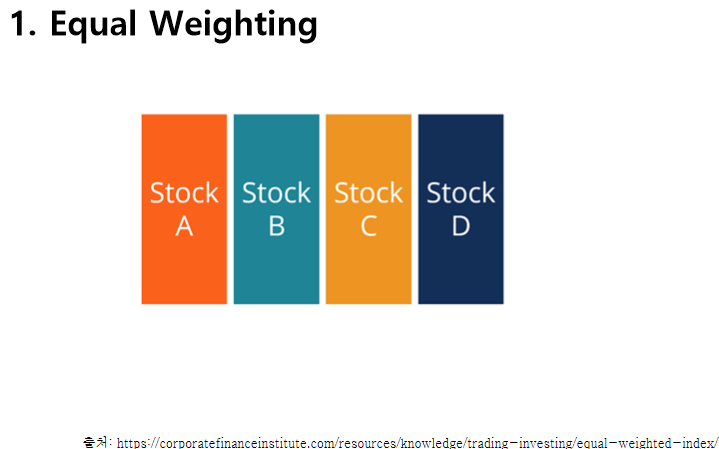


In [ ]:
def get_same_weight(df=Close_df):
    initial_weights = np.full(len(df.columns), 1)
    initial_weights = initial_weights/len(df.columns)
    return initial_weights

initial_weights= get_same_weight(Close_df)
initial_weights

### 무위험 이자율 

- e-나라지표 참조 

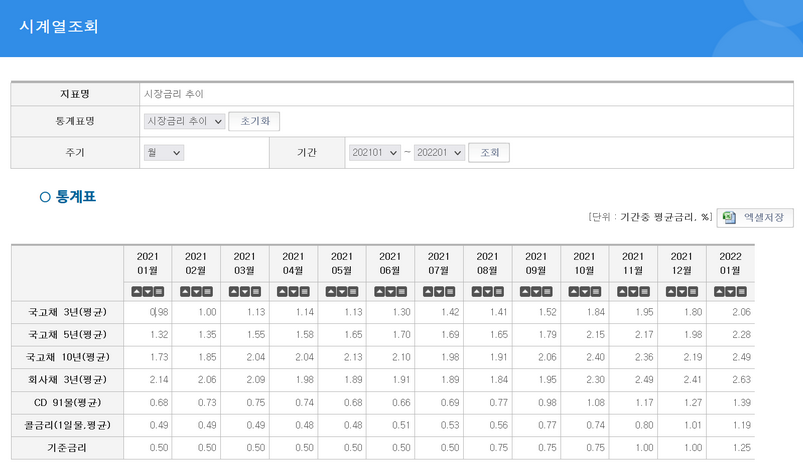



In [ ]:
Rf_1Q = 0.0098
Rf_2Q = 0.0114
Rf_3Q = 0.0142
Rf_4Q = 0.0184

In [ ]:
def Mu_Std_Sharpe (i = 1, n=2, returns = returns_1Q_1, W= initial_weights, Rf=Rf_1Q ):
    
    print('<' + str(i) + 'Q' + '_' + str(n)+'>')

    Cov = returns.cov()
    Cov_annual = Cov * 250
    #print('Annual Coveriance Matrix of' + str(i) + 'Q :', Cov_annual)

    # 포트폴리오 분산의 기댓값 = WT * (공분산 행렬) * W

    Var = np.dot(W.T, np.dot(Cov_annual, W))
    print('Portfolio Variance of ' + str(i) + 'Q' + '_' + str(n) + ':', Var)
    Std = np.sqrt(Var)
    print('Portfolio Standard Deviation of ' +str(i) + 'Q :' + '_' + str(n) + ':', Std)

    Ann_Return = np.sum(returns.mean()*W) * 250
    print('Portfolio Annual Return of ' +str(i) + 'Q' + '_' + str(n) + ':', Ann_Return)
    
    print('Risk Free Rate:', str(Rf))
               
   
    Sharpe = (Ann_Return - Rf) / Std

    print('Sharpe Ratio of ' + str(i) + 'Q' + '_' + str(n) + ':', Sharpe)
    
    return  Ann_Return, Std, Sharpe  

Same_Ann_Return_1Q_2, Same_Std_1Q_2, Same_Sharpe_1Q_2 = Mu_Std_Sharpe(i = 1, n=2, returns = returns_1Q_2, W= initial_weights, Rf=Rf_1Q)
Same_Ann_Return_2Q_2, Same_Std_2Q_2, Same_Sharpe_2Q_2 = Mu_Std_Sharpe(i = 2, n=2, returns = returns_2Q_2, W= initial_weights, Rf=Rf_2Q)
Same_Ann_Return_3Q_2, Same_Std_3Q_2, Same_Sharpe_3Q_2 = Mu_Std_Sharpe(i = 3, n=2, returns = returns_3Q_2, W= initial_weights, Rf=Rf_3Q)
Same_Ann_Return_4Q_2, Same_Std_4Q_2, Same_Sharpe_4Q_2 = Mu_Std_Sharpe(i = 4, n=2, returns = returns_4Q_2, W= initial_weights, Rf=Rf_4Q)




# MVO 최소분산 포트폴리오 

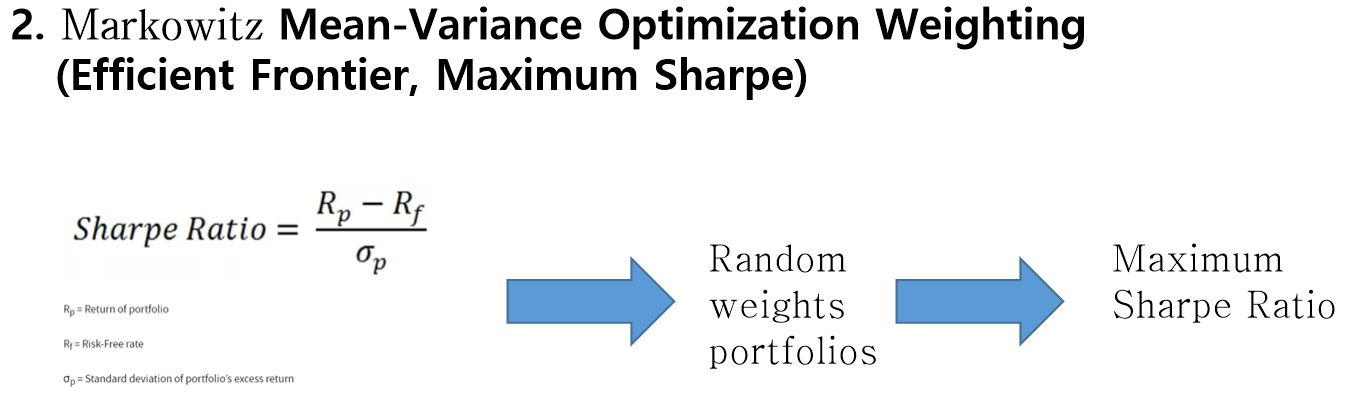

- PyPortfolioOpt로 진행 

In [ ]:
!pip install PyPortfolioOpt

In [ ]:
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns

In [ ]:
start_1Q_1 = '2021-01-04'
end_1Q_1 = '2021-01-31'


start_1Q_2 = '2021-02-01'
end_1Q_2 = '2021-02-28'


start_2Q_1 = '2021-04-01'
end_2Q_1 = '2021-04-30'

start_2Q_2 = '2021-05-01'
end_2Q_2 = '2021-05-31'


start_3Q_1 = '2021-07-01'
end_3Q_1 = '2021-07-31'

start_3Q_2 = '2021-08-01'
end_3Q_2 = '2021-08-30'

start_4Q_1 = '2021-10-01'
end_4Q_1 = '2021-10-31'

start_4Q_2 = '2021-11-01'
end_4Q_2 = '2021-11-30'


Close_df_1Q_1 = Close_df.loc[start_1Q_1:end_1Q_1]
Close_df_2Q_1 = Close_df.loc[start_2Q_1:end_2Q_1]
Close_df_3Q_1 = Close_df.loc[start_3Q_1:end_3Q_1]
Close_df_4Q_1 = Close_df.loc[start_4Q_1:end_4Q_1]

Close_df_1Q_2 = Close_df.loc[start_1Q_2:end_1Q_2]
Close_df_2Q_2 = Close_df.loc[start_2Q_2:end_2Q_2]
Close_df_3Q_2 = Close_df.loc[start_3Q_2:end_3Q_2]
Close_df_4Q_2 = Close_df.loc[start_4Q_2:end_4Q_2]

In [ ]:
return_mean_1Q_1_annual = returns_1Q_1.mean() * 250
return_mean_2Q_1_annual = returns_2Q_1.mean() * 250
return_mean_3Q_1_annual = returns_3Q_1.mean() * 250
return_mean_4Q_1_annual = returns_4Q_1.mean() * 250

Cov_1Q_1 = returns_1Q_1.cov()
Cov_2Q_1 = returns_2Q_1.cov()
Cov_3Q_1 = returns_3Q_1.cov()
Cov_4Q_1 = returns_4Q_1.cov()

return_mean_1Q_2_annual = returns_1Q_2.mean() * 250
return_mean_2Q_2_annual = returns_2Q_2.mean() * 250
return_mean_3Q_2_annual = returns_3Q_2.mean() * 250
return_mean_4Q_2_annual = returns_4Q_2.mean() * 250

Cov_1Q_2 = returns_1Q_2.cov()
Cov_2Q_2 = returns_2Q_2.cov()
Cov_3Q_2 = returns_3Q_2.cov()
Cov_4Q_2 = returns_4Q_2.cov()

In [ ]:
# Sharpe Ratio 최적화 진행 

Ef_Front = EfficientFrontier(return_mean_1Q_1_annual, Cov_1Q_1)
weights = Ef_Front.max_sharpe()
print(weights)
cleaned_weights = Ef_Front.clean_weights()
print(cleaned_weights)
Ef_Front.portfolio_performance(verbose=True)

In [ ]:
Ef_Ann_Return_1Q_1, Ef_Std_1Q_1 = 1.091, 0.023
Ef_Sharpe_1Q_1 = (Ef_Ann_Return_1Q_1 - Rf_1Q)/ Ef_Std_1Q_1
# weights 
Ef_weights_1Q_1 = np.array([0, 0, 0, 0, 0, 0, 0, 1])

In [ ]:
# Sharpe Ratio 최적화 진행 

Ef_Front = EfficientFrontier(return_mean_2Q_1_annual, Cov_2Q_1)
weights = Ef_Front.max_sharpe()
print(weights)
cleaned_weights = Ef_Front.clean_weights()
print(cleaned_weights)
Ef_Front.portfolio_performance(verbose=True)

In [ ]:
Ef_Ann_Return_2Q_1, Ef_Std_2Q_1 = 1.354, 0.012
Ef_Sharpe_2Q_1 = (Ef_Ann_Return_2Q_1 - Rf_2Q)/ Ef_Std_2Q_1
# weights 
Ef_weights_2Q_1 = np.array([0, 0, 0.36839, 0.37327, 0, 0, 0, 0.25834])

In [ ]:
# Sharpe Ratio 최적화 진행 

Ef_Front = EfficientFrontier(return_mean_3Q_1_annual, Cov_3Q_1)
weights = Ef_Front.max_sharpe()
print(weights)
cleaned_weights = Ef_Front.clean_weights()
print(cleaned_weights)
Ef_Front.portfolio_performance(verbose=True)

In [ ]:
Ef_Ann_Return_3Q_1, Ef_Std_3Q_1 =0.0653, 0.01
Ef_Sharpe_3Q_1 = (Ef_Ann_Return_3Q_1 - Rf_3Q)/ Ef_Std_3Q_1
# weights 
Ef_weights_3Q_1 = np.array([0, 0, 0.53702, 0, 0.15416, 0, 0.30883, 0])

In [ ]:
# Sharpe Ratio 최적화 진행 

Ef_Front = EfficientFrontier(return_mean_4Q_1_annual, Cov_4Q_1)
weights = Ef_Front.max_sharpe()
print(weights)
cleaned_weights = Ef_Front.clean_weights()
print(cleaned_weights)
Ef_Front.portfolio_performance(verbose=True)

In [ ]:
Ef_Ann_Return_4Q_1, Ef_Std_4Q_1 =0.844, 0.014
Ef_Sharpe_4Q_1 = (Ef_Ann_Return_4Q_1 - Rf_4Q)/ Ef_Std_4Q_1
# weights 
Ef_weights_4Q_1 = np.array([0, 0, 0, 0.44153, 0, 0.34013, 0, 0.21834])

In [ ]:
Ef_Ann_Return_1Q_2, Ef_Std_1Q_2, Ef_Sharpe_1Q_2 = Mu_Std_Sharpe(i = 1, returns = returns_1Q_2, W= Ef_weights_1Q_1, Rf=Rf_1Q)
Ef_Ann_Return_2Q_2, Ef_Std_2Q_2, Ef_Sharpe_2Q_2 = Mu_Std_Sharpe(i = 1, returns = returns_2Q_2, W= Ef_weights_2Q_1, Rf=Rf_2Q)
Ef_Ann_Return_3Q_2, Ef_Std_3Q_2, Ef_Sharpe_3Q_2 = Mu_Std_Sharpe(i = 1, returns = returns_3Q_2, W= Ef_weights_3Q_1, Rf=Rf_3Q)
Ef_Ann_Return_4Q_2, Ef_Std_4Q_2, Ef_Sharpe_4Q_2 = Mu_Std_Sharpe(i = 1, returns = returns_4Q_2, W= Ef_weights_4Q_1, Rf=Rf_4Q)


# MarketCap & Float Adjusted Method 

## MarketCap Cap_df.tail(10)



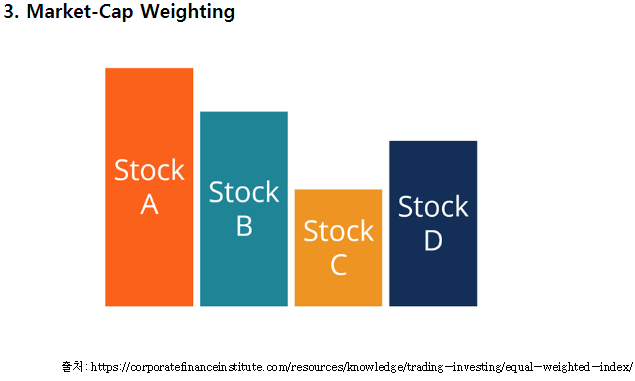

In [ ]:
start = '20210101'
end = '20211231'
year = 1 

stock_names = ['Samsung', 'SkHynix', 'Samsung Bio', 'LG Chemical', 'NAVER', 'Hyundai Car', 'Samsung SDI', 'KAKAO' ]
stock_codes = ['005930', '000660', '207940', '051910', '035420', '005380', '006400', '035720']

list_Cap = []
for code in stock_codes:

    Cap= stock.get_market_cap(start, end, code)
    list_Cap.append(pd.DataFrame(Cap['시가총액']))

Cap_df = pd.concat(list_Cap, axis=1)
Cap_df.columns = [stock_names]
print(Cap_df.head(10))

#-----------------------------------------------

start_1Q_1 = '2021-01-04'
end_1Q_1 = '2021-01-31'


start_1Q_2 = '2021-02-01'
end_1Q_2 = '2021-02-28'


start_2Q_1 = '2021-04-01'
end_2Q_1 = '2021-04-30'

start_2Q_2 = '2021-05-01'
end_2Q_2 = '2021-05-31'


start_3Q_1 = '2021-07-01'
end_3Q_1 = '2021-07-31'

start_3Q_2 = '2021-08-01'
end_3Q_2 = '2021-08-30'

start_4Q_1 = '2021-10-01'
end_4Q_1 = '2021-10-31'

start_4Q_2 = '2021-11-01'
end_4Q_2 = '2021-11-30'


Cap_df_1Q_1 = Cap_df.loc[start_1Q_1:end_1Q_1]
Cap_df_2Q_1 = Cap_df.loc[start_2Q_1:end_2Q_1]
Cap_df_3Q_1 = Cap_df.loc[start_3Q_1:end_3Q_1]
Cap_df_4Q_1 = Cap_df.loc[start_4Q_1:end_4Q_1]

Cap_df_1Q_2 = Cap_df.loc[start_1Q_2:end_1Q_2]
Cap_df_2Q_2 = Cap_df.loc[start_2Q_2:end_2Q_2]
Cap_df_3Q_2 = Cap_df.loc[start_3Q_2:end_3Q_2]
Cap_df_4Q_2 = Cap_df.loc[start_4Q_2:end_4Q_2]

In [ ]:
Cap_df.tail(10)



## Float Adjusted Weighting 

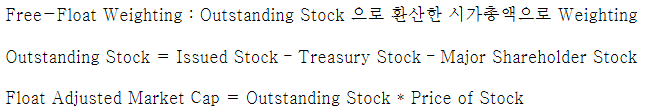

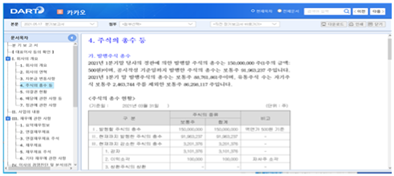

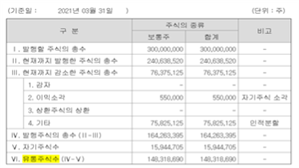

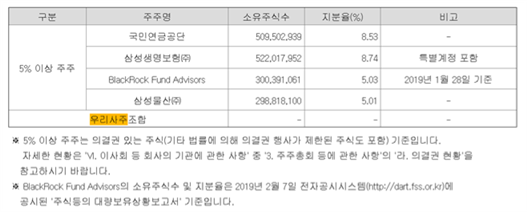

In [ ]:
pd.read_csv(f'../input/floating/Float_2021_1Q.xls', encoding='cp949', index_col = '종목 ').columns

In [ ]:

import pandas as pd
file_names = ['Float_2020_4Q.xls', 'Float_2021_1Q.xls', 'Float_2021_2Q.xls', 'Float_2021_3Q.xls']
    

def get_float_df (file_name = file_names[0]):
    

    df = pd.read_csv(f'../input/floating/{file_name}', encoding='cp949', index_col = '종목 ')
    
    try: 
        df.drop(columns=['Unnamed: 6'], inplace=True)
    
    except: 
        pass

    df['유동주식수'] = df['발행주식수\n(보통주) '] - df['자기주식수'] - df['우리사주조합'] - df['지분율 5% 이상 최대주주들 주식수']

    df.columns = ['발행주식수', '자기주식수', '우리사주조합', '최대주주(지분5%이상)', '최대주주명',
           '유동주식수']

    df['유동주식비율'] = df.유동주식수 / df.발행주식수
    
    return df 


float_list = []
for file_name in file_names:
    
    df = get_float_df(file_name)
    float_list.append(df)

Float_2020_4Q = float_list[0]
Float_2021_1Q = float_list[1]
Float_2021_2Q = float_list[2]
Float_2021_3Q = float_list[3]


Float_2021_1Q

In [ ]:
Float_Adj_Cap_1Q_1 = Float_2020_4Q.유동주식비율.values
Float_Adj_Cap_2Q_1 = Float_2021_1Q.유동주식비율.values
Float_Adj_Cap_3Q_1 = Float_2021_2Q.유동주식비율.values
Float_Adj_Cap_4Q_1 = Float_2021_3Q.유동주식비율.values


In [ ]:

def get_cap_weights (Cap_df =Cap_df_1Q_1):

    cap_weights= np.array([Cap_df.mean()[0]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[1]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[2]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[3]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[4]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[5]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[6]/np.sum(Cap_df.mean()),
                               Cap_df.mean()[7]/np.sum(Cap_df.mean())])

    return cap_weights

def get_float_adj_weights (Cap_df =Float_Adj_Cap_1Q_1):

    float_adj_weights= np.array([Cap_df[0]/np.sum(Cap_df),
                               Cap_df[1]/np.sum(Cap_df),
                               Cap_df[2]/np.sum(Cap_df),
                               Cap_df[3]/np.sum(Cap_df),
                               Cap_df[4]/np.sum(Cap_df),
                               Cap_df[5]/np.sum(Cap_df),
                               Cap_df[6]/np.sum(Cap_df),
                               Cap_df[7]/np.sum(Cap_df)])

    return float_adj_weights





cap_weights_1Q_1 = get_cap_weights (Cap_df =Cap_df_1Q_1)
cap_weights_2Q_1 = get_cap_weights (Cap_df =Cap_df_2Q_1)
cap_weights_3Q_1 = get_cap_weights (Cap_df =Cap_df_3Q_1)
cap_weights_4Q_1 = get_cap_weights (Cap_df =Cap_df_4Q_1)


float_adj_weights_1Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_1Q_1)
float_adj_weights_2Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_2Q_1)
float_adj_weights_3Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_3Q_1)
float_adj_weights_4Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_4Q_1)

float_adj_weights_1Q_1

In [ ]:
print('<Market Cap Method>')
cap_Ann_Return_1Q_2, cap_Std_1Q_2, cap_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_1Q_1, W= cap_weights_1Q_1)
cap_Ann_Return_2Q_2, cap_Std_2Q_2, cap_Sharpe_2Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_2Q_1, W= cap_weights_2Q_1)
cap_Ann_Return_3Q_2, cap_Std_3Q_2, cap_Sharpe_3Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_3Q_1, W= cap_weights_3Q_1)
cap_Ann_Return_4Q_2, cap_Std_4Q_2, cap_Sharpe_4Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_4Q_1, W= cap_weights_4Q_1)


print('<Cap Adjusted Method>')
float_adj_Ann_Return_1Q_2, float_adj_Std_1Q_2, float_adj_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_1Q_1, W= float_adj_weights_1Q_1)
float_adj_Ann_Return_2Q_2, float_adj_Std_2Q_2, float_adj_Sharpe_2Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_2Q_1, W= float_adj_weights_2Q_1)
float_adj_Ann_Return_3Q_2, float_adj_Std_3Q_2, float_adj_Sharpe_3Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_3Q_1, W= float_adj_weights_3Q_1)
float_adj_Ann_Return_4Q_2, float_adj_Std_4Q_2, float_adj_Sharpe_4Q_2 = Mu_Std_Sharpe (i = 1, n=2, returns = returns_4Q_1, W= float_adj_weights_4Q_1)


# Black-Litterman Model 

## 1. Weighting by Π (Implied Returns) 


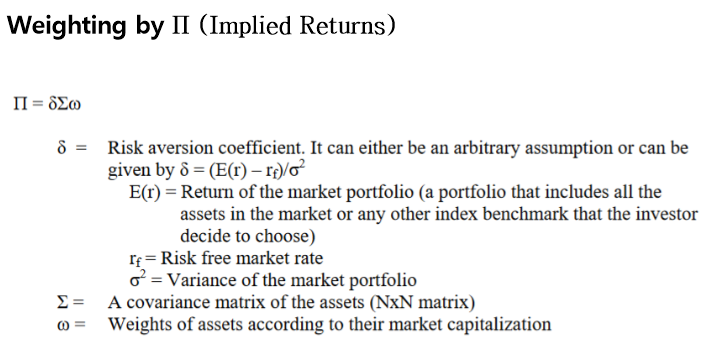



## 2. Weighting by E(R) (Applying Investers' Views) 

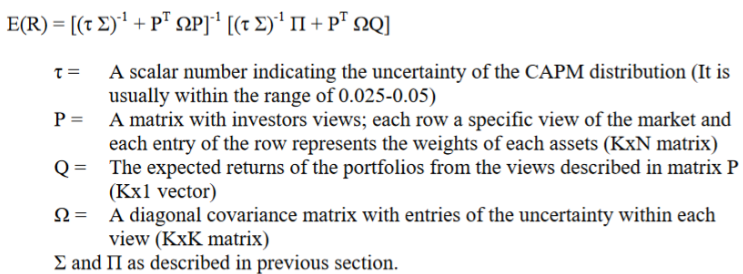


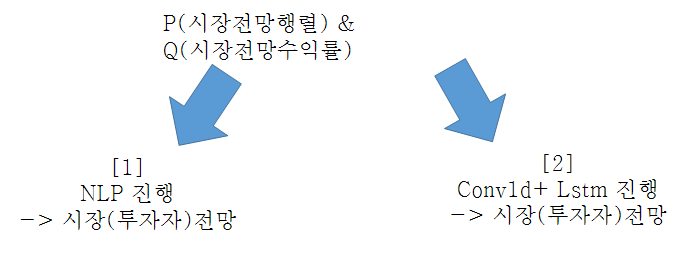

### NLP 

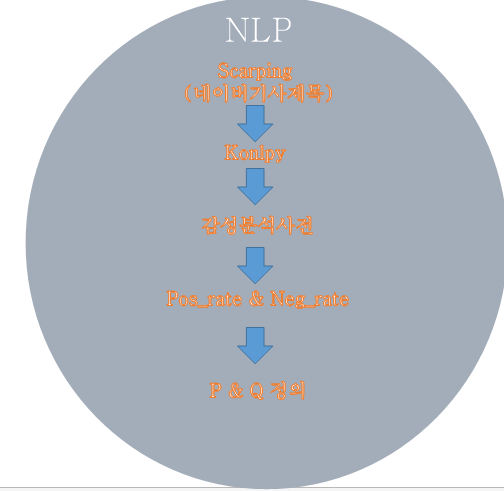


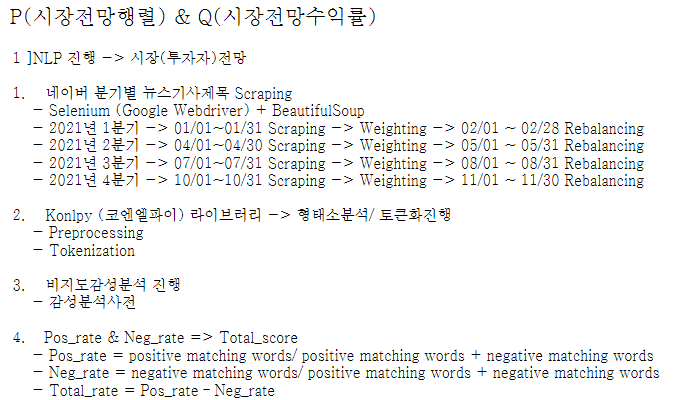


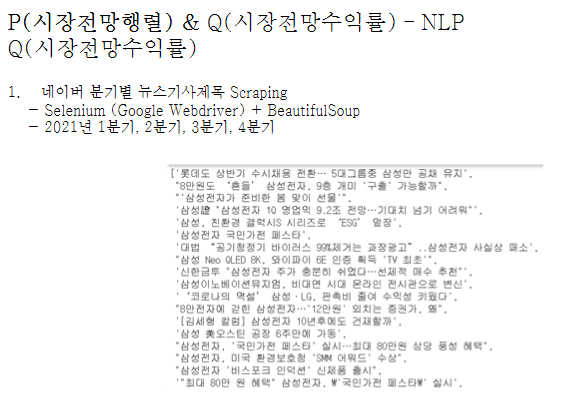

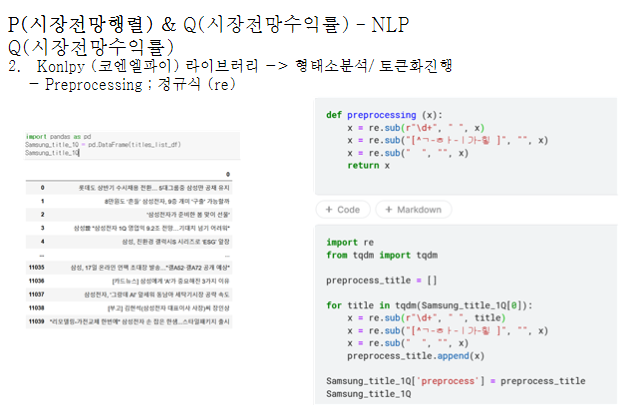


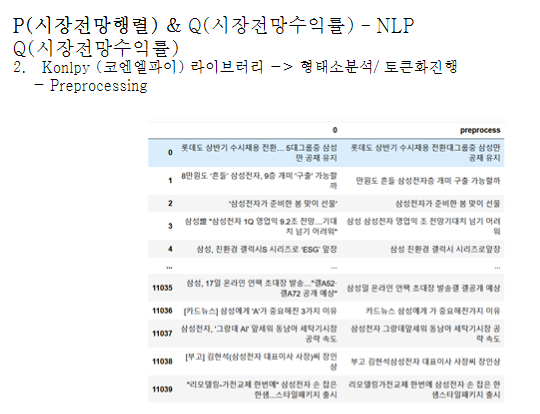

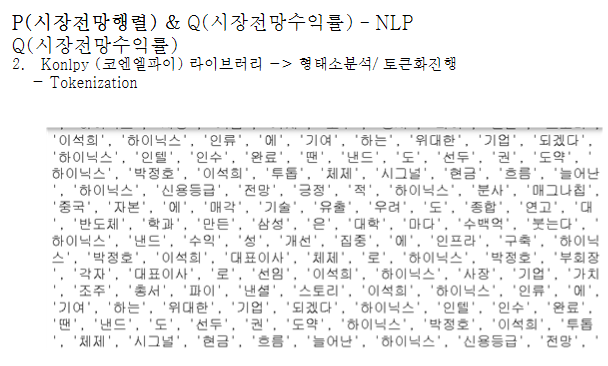

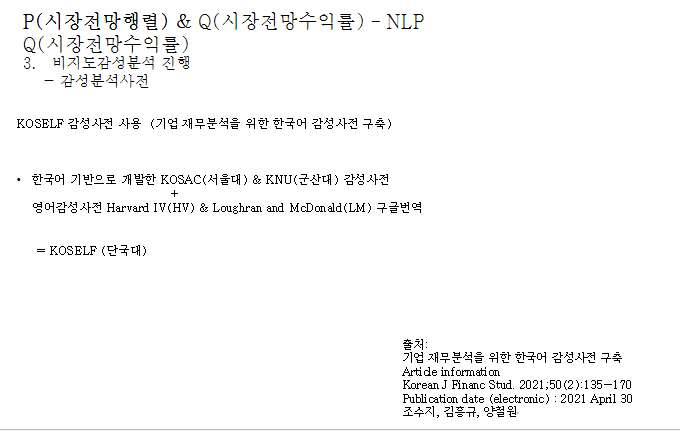

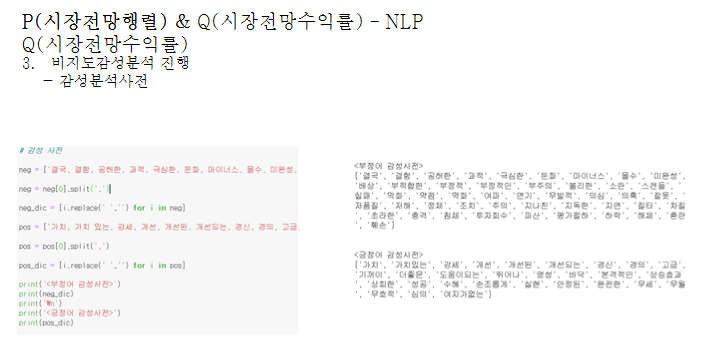

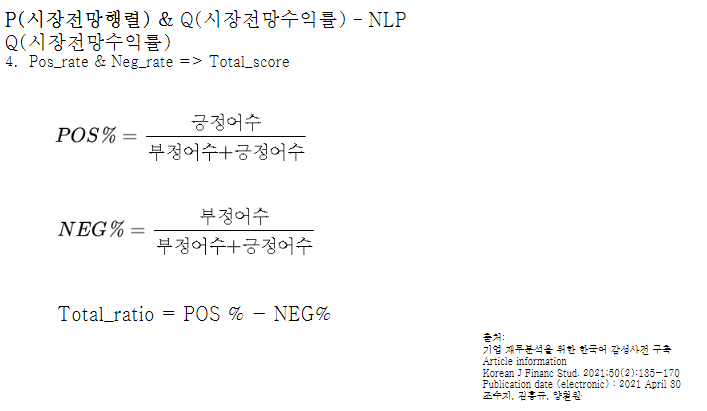

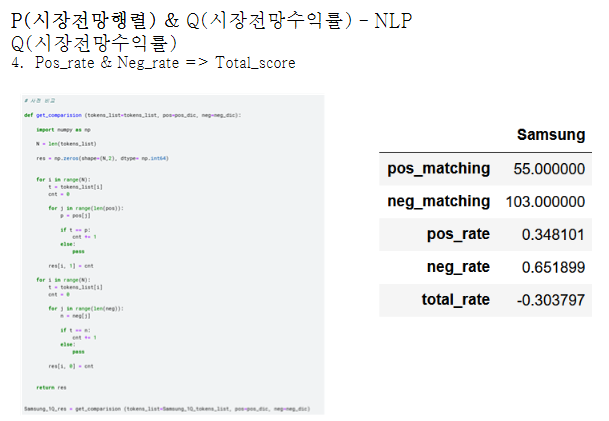

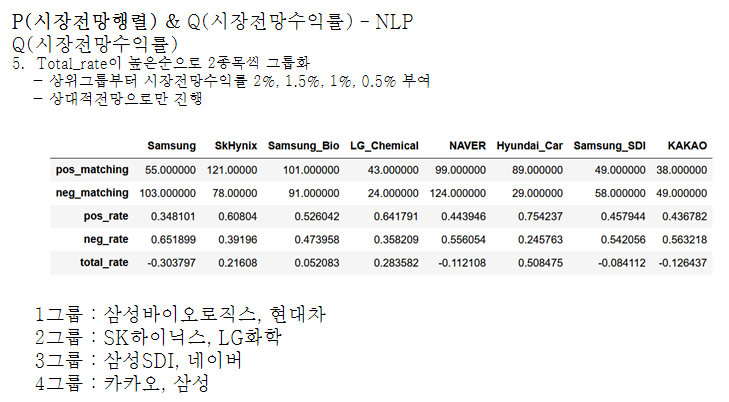

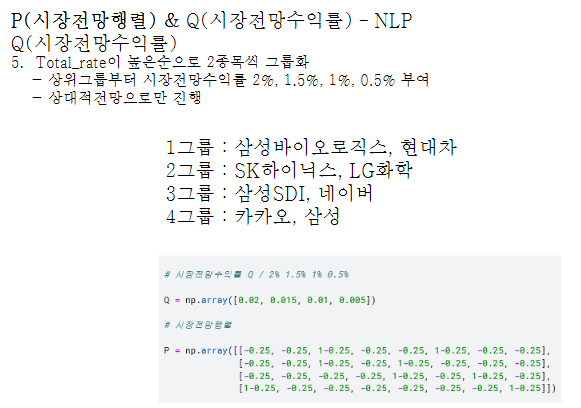





### Conv1d + LSTM 

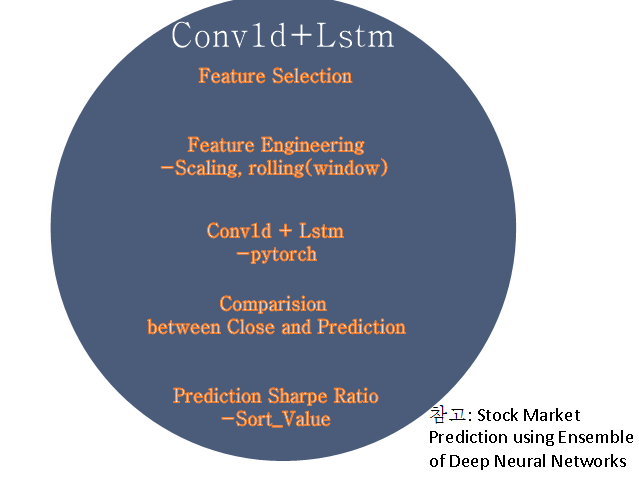


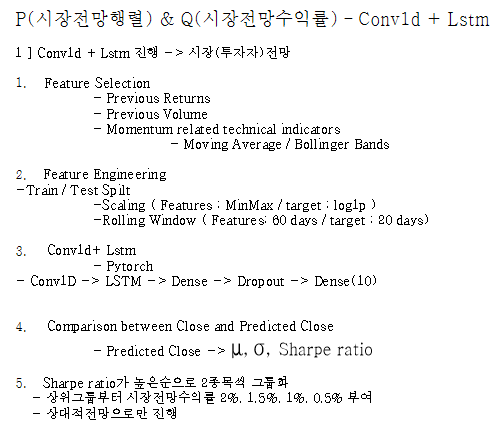

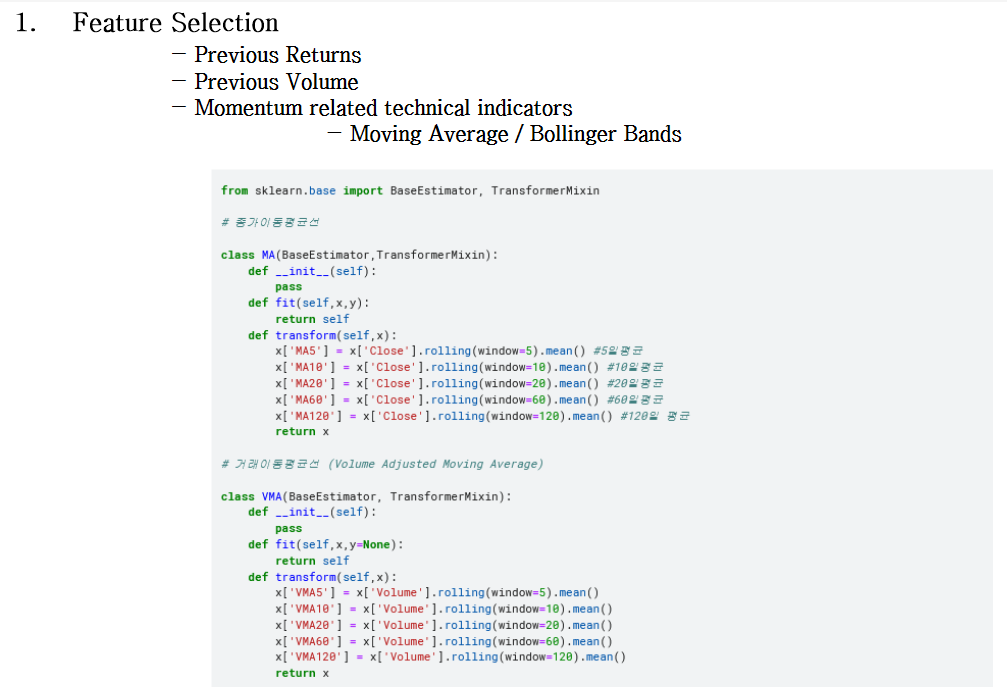

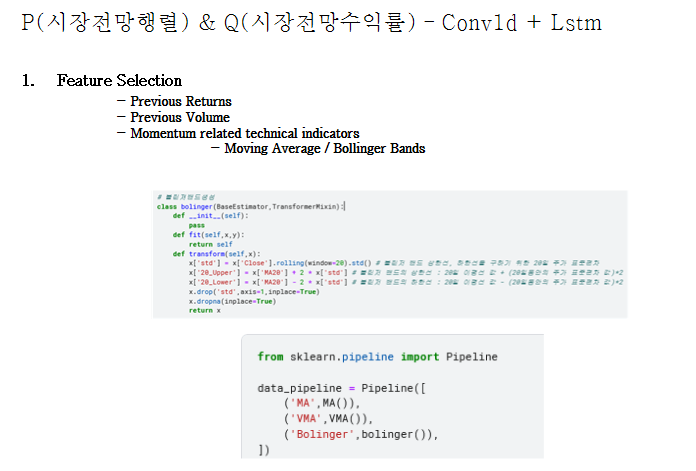

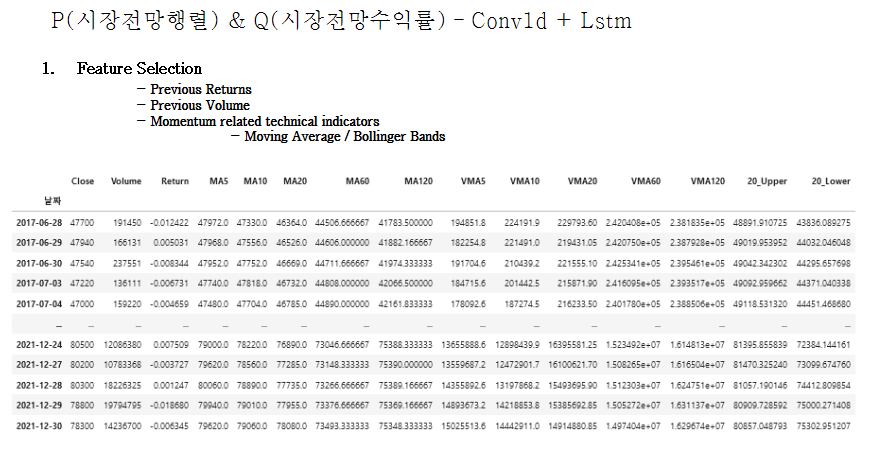

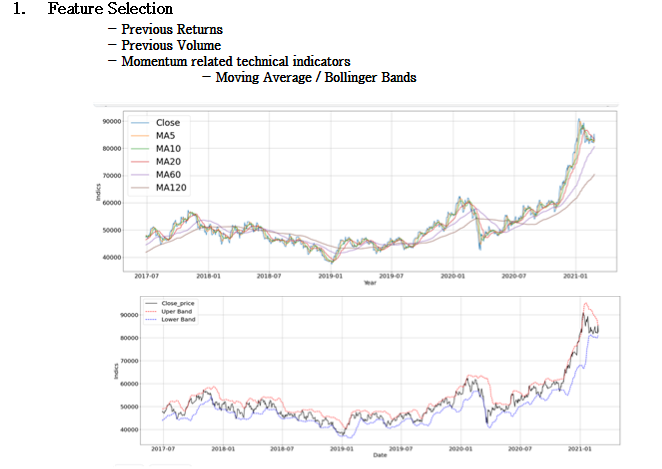

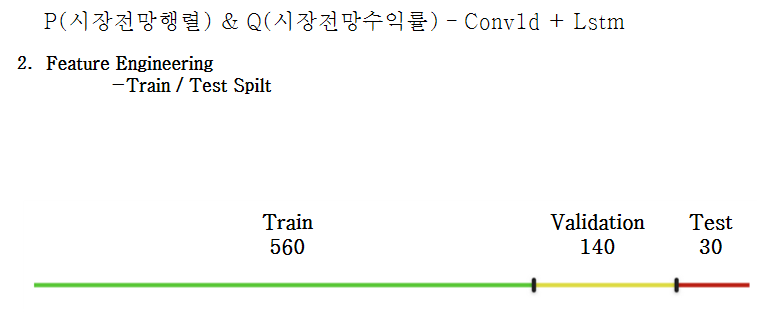

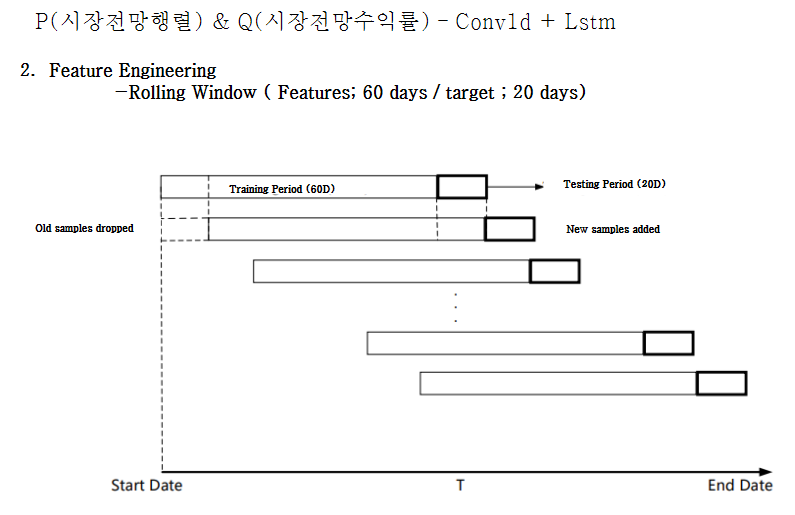

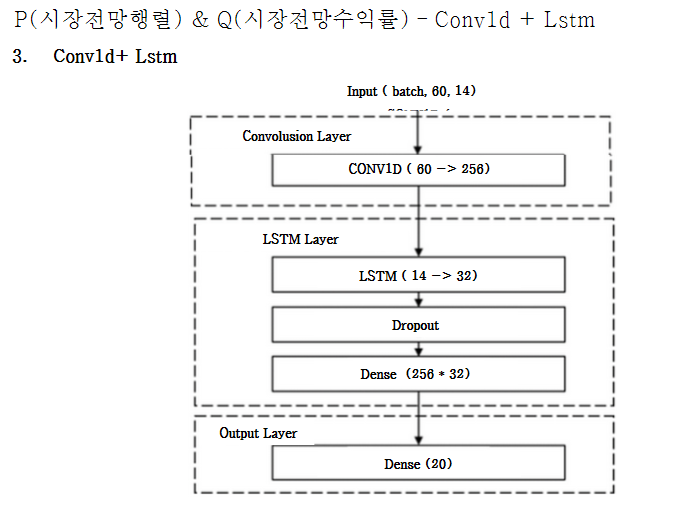

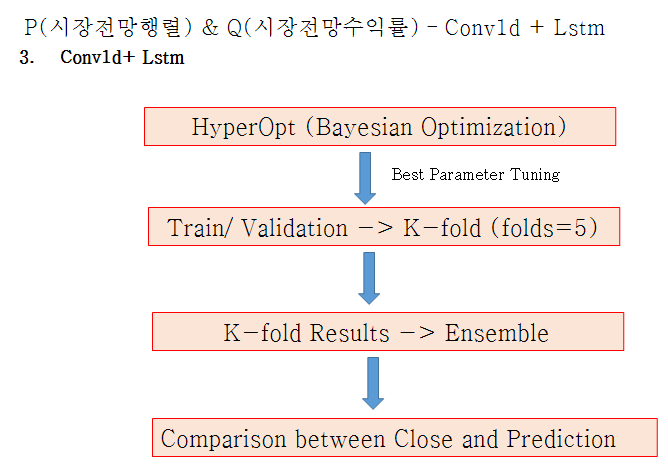

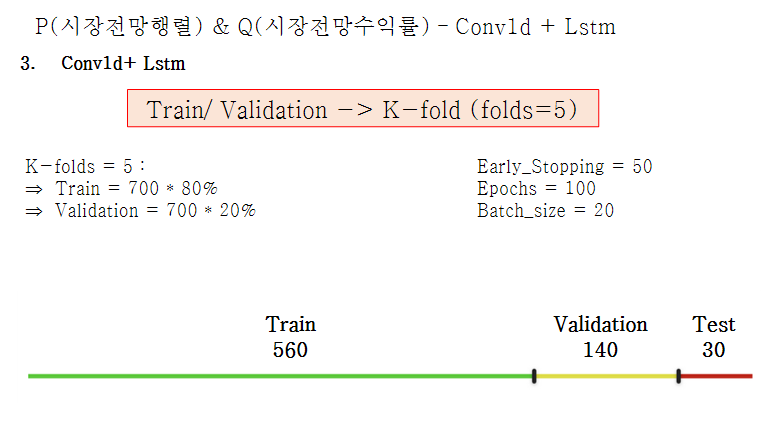




In [ ]:
# 포트폴리오 수익률 

returns_Annual_1Q_1 = (returns_1Q_1.mean() *250).values
returns_Annual_2Q_1 = (returns_2Q_1.mean() *250).values
returns_Annual_3Q_1= (returns_3Q_1.mean() *250).values
returns_Annual_4Q_1 = (returns_4Q_1.mean() *250).values



#포트폴리오 투자비중 
# floated_weights_1Q = get_floated_weights (Cap_df =Cap_df_1Q)
# floated_weights_2Q = get_floated_weights (Cap_df =Cap_df_2Q)
# floated_weights_3Q = get_floated_weights (Cap_df =Cap_df_3Q)
# floated_weights_4Q = get_floated_weights (Cap_df =Cap_df_4Q)

#1Q_1 weights로 진행 

# float_adj_weights_1Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_1Q_1)
# float_adj_weights_2Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_2Q_1)
# float_adj_weights_3Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_3Q_1)
# float_adj_weights_4Q_1 = get_float_adj_weights (Cap_df =Float_Adj_Cap_4Q_1)

#자산간 수익률 공분산 행렬 

Cov_Annual_1Q_1 = returns_1Q_1.cov() *250
Cov_Annual_2Q_1 = returns_2Q_1.cov() *250
Cov_Annual_3Q_1 = returns_3Q_1.cov() *250
Cov_Annual_4Q_1 = returns_4Q_1.cov() *250


def get_black_weights (Cov= Cov_1Q_1, weights= float_adj_weights_1Q_1, returns_Annual= returns_Annual_1Q_1, Rf=Rf_1Q): 

    # 벤치마크 분산 = Wmkt.T * 자산간 수익률 공분산 * Wmkt

    Var_bench = np.dot(np.dot(weights.T, Cov), weights)

    # 위험회피계수 = (E(r)[Wmkt * weights] - Rf) / 벤치마크분산 

    Expected_R= np.dot(weights, returns_Annual)

    Risk_Aversion= (Expected_R - Rf) / Var_bench

    # 균형기대수익률 = 위험회피계수 * 자산간 수익률 공분산 * Weights 

    balanced_Expected_R = np.dot(np.dot(Risk_Aversion, Cov), weights) +Rf


    # 시장전망수익률 Q / 2% 1.5% 1% 0.5%

    Q = np.array([0.02, 0.015, 0.01, 0.005])

    # 시장전망행렬 

    P = np.array([[-0.25, -0.25, 1-0.25, 1-0.25, -0.25,  -0.25, -0.25, -0.25],
                  [-0.25, -0.25, -0.25, -0.25, 1-0.25, -0.25, 1-0.25, -0.25],
                  [-0.25, 1-0.25, -0.25, -0.25, -0.25, 1-0.25, -0.25, -0.25],
                  [1-0.25, -0.25, -0.25, -0.25, -0.25, -0.25, -0.25, 1-0.25]])
    # 위험조정상수 1/3개월 = 3 


    T = 1/3

    # 투자자전망의 불확실성 = 시장전망행렬 * (위험조정상수 * 공분산) * 시장전망행렬.T 

    uncertainty = np.dot(np.dot(P, T*Cov), P.T) 

    # 블랙리터만 모형으로 결합전망기대수익률 구하기 / E(E(r)\균형기대수익률) 

    # 1. Part1 

    # 1-1. (T * 공분산).-1  


    Black_1_1 = np.linalg.inv(np.dot(T, Cov))

    # 1-2. (P.T * 전망불확실성.-1 * P) 

    #Black_1_2 = np.dot(np.dot(P.T, np.linalg.inv(uncertainty)), P)
    Black_1_2 = np.dot(P.T, np.linalg.inv(uncertainty))
    Black_1_2 = np.dot(Black_1_2, P)

    # 1. [Black1 + Black2]-1

    Black_1 = np.linalg.inv(Black_1_1 + Black_1_2)

    # -------------------------------------------------------------------------------

    # 2. Part 2

    # 2-1 (T * 공분산).-1 * 균형기대수익률 

    Black_2_1 = np.dot(np.linalg.inv(T * Cov), balanced_Expected_R) 

    # 2-2 P.T * Uncertainty.-1 * Q 

    Black_2_2 = np.dot(np.dot(P.T, np.linalg.inv(uncertainty)), Q)


    # 2. [Black_2_1 + Black_2_2] 

    Black_2 = Black_2_1 + Black_2_2

    #------------------------------------------------------------------------------------------

    # 3. Part 3 

    # 3. 최종 결합기대수익률,  E(r) = Black_1 * Black_2 

    Black_Er = np.dot(Black_1, Black_2) + Rf
    Black_Er

    #------------------------------------------------------------------------------------------

    #4. Part 4 

    # 4. 최종 weights = (벤치마크 분산 * 공분산).-1 *( 최종 결합기대수익률 - Rf) 

    black_weights = np.dot(np.linalg.inv(np.dot(Risk_Aversion, Cov)), Black_Er -Rf)
    
    return black_weights, balanced_Expected_R, Black_Er



In [ ]:
black_weights_1Q_1, pi_1Q_1, pi_adj_1Q_1 = get_black_weights (Cov= Cov_Annual_1Q_1, weights= float_adj_weights_1Q_1, returns_Annual= returns_Annual_1Q_1, Rf= Rf_1Q) 
black_weights_2Q_1, pi_2Q_1, pi_adj_2Q_1 = get_black_weights (Cov= Cov_Annual_2Q_1, weights= float_adj_weights_2Q_1, returns_Annual= returns_Annual_2Q_1, Rf= Rf_2Q) 
black_weights_3Q_1, pi_3Q_1, pi_adj_3Q_1 = get_black_weights (Cov= Cov_Annual_3Q_1, weights= float_adj_weights_3Q_1, returns_Annual= returns_Annual_3Q_1, Rf= Rf_3Q) 
black_weights_4Q_1, pi_4Q_1, pi_adj_4Q_1 = get_black_weights (Cov= Cov_Annual_4Q_1, weights= float_adj_weights_4Q_1, returns_Annual= returns_Annual_4Q_1, Rf= Rf_4Q) 


In [ ]:
import matplotlib.pylab as plt

import numpy as np
from numpy.linalg import inv
import pandas as pd
from pandas_datareader import data as web

from scipy.optimize import minimize


# 무위험수익률, 수익률,공분산으로
# 샤프비율을 최대로 하는 접점포트폴리오 비중 계산 
def solveWeights(R, C, rf):
    
    # 파이썬은 함수안에 함수를 정의할 수 있다
    # 최적비중계산을 위해 다음과 같이 목적함수를 정의한다
    def obj(W, R, C, rf):
        mean = sum(R * W)
        var = np.dot(np.dot(W, C), W)
        #샤프비율을 효용함수로 한다
        util = (mean - rf) / np.sqrt(var) 
        # 효용함수 극대화= 효용함수 역함수를 최소화하는 것이다.
        return 1 / util  

    n = len(R)  # 투자자산 갯수

    # 동일비중으로 최적화 시작
    W = np.ones([n]) / n  
    # 비중범위는 0~100%사이(공매도나 차입조건이 없음)
    bnds = [(0., 1.) for i in range(n)]  
    # 제약조건은 비중합=100%
    cons = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.}) 
    # 최적화
    res = minimize(obj, W, (R, C, rf), method='SLSQP', constraints=cons, bounds=bnds)
#     if not res.success:
#       # 최적화 실패한 경우 
#       raise BaseException(res.message)
#     # 최적화 결과를 돌려준다  
    return res.x

In [ ]:
pi_weights_1Q_1 = solveWeights(pi_1Q_1 + Rf_1Q, Cov_Annual_1Q_1, Rf_1Q)
pi_weights_2Q_1 = solveWeights(pi_2Q_1 + Rf_2Q, Cov_Annual_2Q_1, Rf_2Q)
pi_weights_3Q_1 = solveWeights(pi_3Q_1 + Rf_3Q, Cov_Annual_3Q_1, Rf_3Q)
pi_weights_4Q_1 = solveWeights(pi_4Q_1 + Rf_4Q, Cov_Annual_4Q_1, Rf_4Q)


In [ ]:
pi_adj_weights_1Q_1 = solveWeights(pi_adj_1Q_1 + Rf_1Q, Cov_Annual_1Q_1, Rf_1Q)
pi_adj_weights_2Q_1 = solveWeights(pi_adj_2Q_1 + Rf_2Q, Cov_Annual_1Q_1, Rf_2Q)
pi_adj_weights_3Q_1 = solveWeights(pi_adj_3Q_1 + Rf_3Q, Cov_Annual_1Q_1, Rf_3Q)
pi_adj_weights_4Q_1 = solveWeights(pi_adj_4Q_1 + Rf_4Q, Cov_Annual_1Q_1, Rf_4Q)


In [ ]:
BL_Ann_Return_1Q_2, BL_Std_1Q_2, BL_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_1Q_2, W= black_weights_1Q_1)
BL_Ann_Return_2Q_2, BL_Std_2Q_2, BL_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_2Q_2, W= black_weights_2Q_1)
BL_Ann_Return_3Q_2, BL_Std_3Q_2, BL_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_3Q_2, W= black_weights_3Q_1)
BL_Ann_Return_4Q_2, BL_Std_4Q_2, BL_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_4Q_2, W= black_weights_4Q_1)

In [ ]:
import matplotlib.pylab as plt

import numpy as np
from numpy.linalg import inv
import pandas as pd
from pandas_datareader import data as web

from scipy.optimize import minimize


# 무위험수익률, 수익률,공분산으로
# 샤프비율을 최대로 하는 접점포트폴리오 비중 계산 
def solveWeights(R, C, rf):
    
    # 파이썬은 함수안에 함수를 정의할 수 있다
    # 최적비중계산을 위해 다음과 같이 목적함수를 정의한다
    def obj(W, R, C, rf):
        mean = sum(R * W)
        var = np.dot(np.dot(W, C), W)
        #샤프비율을 효용함수로 한다
        util = (mean - rf) / np.sqrt(var) 
        # 효용함수 극대화= 효용함수 역함수를 최소화하는 것이다.
        return 1 / util  

    n = len(R)  # 투자자산 갯수

    # 동일비중으로 최적화 시작
    W = np.ones([n]) / n  
    # 비중범위는 0~100%사이(공매도나 차입조건이 없음)
    bnds = [(0., 1.) for i in range(n)]  
    # 제약조건은 비중합=100%
    cons = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.}) 
    # 최적화
    res = minimize(obj, W, (R, C, rf), method='SLSQP', constraints=cons, bounds=bnds)
    if not res.success:
      # 최적화 실패한 경우 
      raise BaseException(res.message)
    # 최적화 결과를 돌려준다  
    return res.x

In [ ]:
# 무위험수익률, 수익률,공분산으로 효율적 프런티어 계산
def solveFrontier(R, C, rf):

    # 파이썬은 함수안에 함수를 정의할 수 있다
    # 최적비중계산을 위해 다음과 같이 목적함수를 정의한다
    def obj(W, R, C, r):
        # 주어진 수익률에서 분산을 최소로 하는 비중 계산
        mean = sum(R * W)
        var = np.dot(np.dot(W, C), W)
        # 최적화 제약조건 페널티
        penalty = 100 * abs(mean - r)             
        return var + penalty

    # 효율적 프론티어를 구성하는 평균-분산을 돌려줄
    # 리스트를 미리 준비한다
    frontier_mean, frontier_var = [], []

    n = len(R)  # 투자자산 갯수

    # 수익률 최저~최대 사이를 반복한다
    for r in np.linspace(min(R), max(R), num=20):
        # 최적화 함수에 전달할 초기값으로 동일비중으로 시작한다
        W = np.ones([n]) / n 

        # 최적화 함수에 전달할 범위조건과 제약조건을 미리 준비한다
        # 범위조건: 각 구성자산의 투자비중은 0~100% 사이이며
        # 제약조건: 전체 투자비중은 100%이다.
        bnds = [(0, 1) for i in range(n)]
        cons = ({'type': 'eq', 'fun': lambda W: sum(W) - 1.})
        
        # 최적화 함수 minimize()은 최적화할 obj함수와 
        # 최적화를 시작할 초깃값을 인수로 받는다.         
        res = minimize(obj, W, (R, C, r), method='SLSQP', constraints=cons, bounds=bnds)
        if not res.success:
            # 최적화에 실패한 경우
            raise BaseException(res.message)
        
        # 효율적 프런티어 평균과 분산리스트에 
        # 최적포트폴리오 수익률과 분산 추가
        frontier_mean.append(r)
        frontier_var.append(np.dot(np.dot(res.x, C), res.x))
    return np.array(frontier_mean), np.array(frontier_var)
# 효율적 포트폴리오 최적화        

In [ ]:
# 효율적 포트폴리오 최적화        
def optimize_frontier(R, C, rf):

    # 접점포트폴리오 계산
    W = solveWeights(R, C, rf)
    # 투자비중으로 계산한 평균과 분산
    tan_mean = sum(R * W)
    tan_var = np.dot(np.dot(W, C), W)    

    # 효율적 포트폴리오 계산
    eff_mean, eff_var = solveFrontier(R, C, rf)

    # 비중, 접점포트폴리오의 평균/분산, 효율적 포트폴리오의 평균/분산을
    # 딕셔너리 데이터형으로 돌려준다    
    return {'weights':W, 'tan_mean':tan_mean, 'tan_var':tan_var, 'eff_mean':eff_mean, 'eff_var':eff_var}

In [ ]:
from IPython.core.display import display, HTML
pd.options.display.float_format = '{:.2%}'.format

display(HTML('<h2>Equal Weighting</h2>'))
display(pd.DataFrame({'Weight': initial_weights }, index=stock_names).T)


display(HTML('<h2>MVO Maximum Sharpe Ratio Weighting</h2>'))
display(pd.DataFrame({'Weight': Ef_weights_1Q_1 }, index=stock_names).T)

display(HTML('<h2>Market Cap Weighting</h2>'))
display(pd.DataFrame({'Weight': cap_weights_1Q_1 }, index=stock_names).T)

display(HTML('<h2>Float Adjusted Weighting</h2>'))
display(pd.DataFrame({'Weight': float_adj_weights_1Q_1 }, index=stock_names).T)


display(HTML('<h2>Implied Weighting</h2>'))
display(pd.DataFrame({'Weight': pi_weights_1Q_1}, index=stock_names).T)

# 3번째 최적화 결과
display(HTML('<h2>Implied Weighting with adjusted views</h2>'))
display(pd.DataFrame({'Weight': pi_adj_weights_1Q_1}, index=stock_names).T)

In [ ]:
#균형초과수익률 (파이)로 계산한 weights 
Pi_Ann_Return_1Q_2, Pi_Std_1Q_2, Pi_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_1Q_2, W= pi_weights_1Q_1 )
Pi_Ann_Return_2Q_2, Pi_Std_2Q_2, Pi_Sharpe_2Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_2Q_2, W= pi_weights_2Q_1 )
Pi_Ann_Return_3Q_2, Pi_Std_3Q_2, Pi_Sharpe_3Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_3Q_2, W= pi_weights_3Q_1 )
Pi_Ann_Return_4Q_2, Pi_Std_4Q_2, Pi_Sharpe_4Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_4Q_2, W= pi_weights_4Q_1 )

#투자자전망결합수익률로 계산한 weights 
Pi_Adj_Ann_Return_1Q_2, Pi_Adj_Std_1Q_2, Pi_Adj_Sharpe_1Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_1Q_2, W= pi_adj_weights_1Q_1 )
Pi_Adj_Ann_Return_2Q_2, Pi_Adj_Std_2Q_2, Pi_Adj_Sharpe_2Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_2Q_2, W= pi_adj_weights_2Q_1 )
Pi_Adj_Ann_Return_3Q_2, Pi_Adj_Std_3Q_2, Pi_Adj_Sharpe_3Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_3Q_2, W= pi_adj_weights_3Q_1 )
Pi_Adj_Ann_Return_4Q_2, Pi_Adj_Std_4Q_2, Pi_Adj_Sharpe_4Q_2 = Mu_Std_Sharpe (i = 1, returns = returns_4Q_2, W= pi_adj_weights_4Q_1 )


In [ ]:
pd.set_option('display.float_format', '{:,.1f}'.format)

# labels = ['Same_W', 'Cap_W', 'Float_Adj_W', 'Pi_W', 'BL_W' ]
# value_Return= [Same_Ann_Return_2Q_2,  cap_Ann_Return_1Q_2, float_adj_Ann_Return_1Q_2, Pi_Ann_Return_1Q_2, Pi_Adj_Ann_Return_1Q_2]
# value_Std=[Same_Std_1Q_2, cap_Std_1Q_2, float_adj_Std_1Q_2, Pi_Std_1Q_2, Pi_Adj_Std_1Q_2 ]
# value_Sharpe=[Same_Sharpe_1Q_2, cap_Sharpe_1Q_2, float_adj_Sharpe_1Q_2, Pi_Sharpe_1Q_2, Pi_Adj_Sharpe_1Q_2 ]

labels = ['Same_W', 'Cap_W', 'Float_Adj_W', 'Pi_W', 'BL_W' ]
value_Return= [Same_Ann_Return_2Q_2,  cap_Ann_Return_2Q_2, float_adj_Ann_Return_2Q_2, Pi_Ann_Return_2Q_2, Pi_Adj_Ann_Return_2Q_2]
value_Std=[Same_Std_2Q_2, cap_Std_2Q_2, float_adj_Std_2Q_2, Pi_Std_2Q_2, Pi_Adj_Std_2Q_2 ]
value_Sharpe=[Same_Sharpe_2Q_2, cap_Sharpe_2Q_2, float_adj_Sharpe_2Q_2, Pi_Sharpe_2Q_2, Pi_Adj_Sharpe_2Q_2 ]

# labels = ['Same_W', 'Cap_W', 'Float_Adj_W', 'Pi_W', 'BL_W' ]
# value_Return= [Same_Ann_Return_3Q_2,  cap_Ann_Return_3Q_2, float_adj_Ann_Return_3Q_2, Pi_Ann_Return_3Q_2, Pi_Adj_Ann_Return_3Q_2]
# value_Std=[Same_Std_3Q_2, cap_Std_3Q_2, float_adj_Std_3Q_2, Pi_Std_3Q_2, Pi_Adj_Std_3Q_2 ]
# value_Sharpe=[Same_Sharpe_3Q_2, cap_Sharpe_3Q_2, float_adj_Sharpe_3Q_2, Pi_Sharpe_3Q_2, Pi_Adj_Sharpe_3Q_2 ]

# labels = ['Same_W', 'Cap_W', 'Float_Adj_W', 'Pi_W', 'BL_W' ]
# value_Return= [Same_Ann_Return_4Q_2,  cap_Ann_Return_4Q_2, float_adj_Ann_Return_4Q_2, Pi_Ann_Return_4Q_2, Pi_Adj_Ann_Return_4Q_2]
# value_Std=[Same_Std_4Q_2, cap_Std_4Q_2, float_adj_Std_4Q_2, Pi_Std_4Q_2, Pi_Adj_Std_4Q_2 ]
# value_Sharpe=[Same_Sharpe_4Q_2, cap_Sharpe_4Q_2, float_adj_Sharpe_4Q_2, Pi_Sharpe_4Q_2, Pi_Adj_Sharpe_4Q_2 ]



x = np.arange(len(labels))  # the label locations
width = 0.25  # the width of the bars

fig, ax = plt.subplots(figsize=(50,50))

plt.rc('font', size=50)

rects1 = ax.bar(x - width*1, value_Return, width, label='Return')
rects2 = ax.bar(x, value_Std, width, label='Std')
rects3 = ax.bar(x + width*1, value_Sharpe, width, label='Sharpe')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Comparison by Weighting Method')
ax.set_xticks(x, labels)
ax.legend(title_fontsize= 50)

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)


fig.tight_layout()
plt.savefig('fig1.png', dpi=300)

plt.show()

# Result 

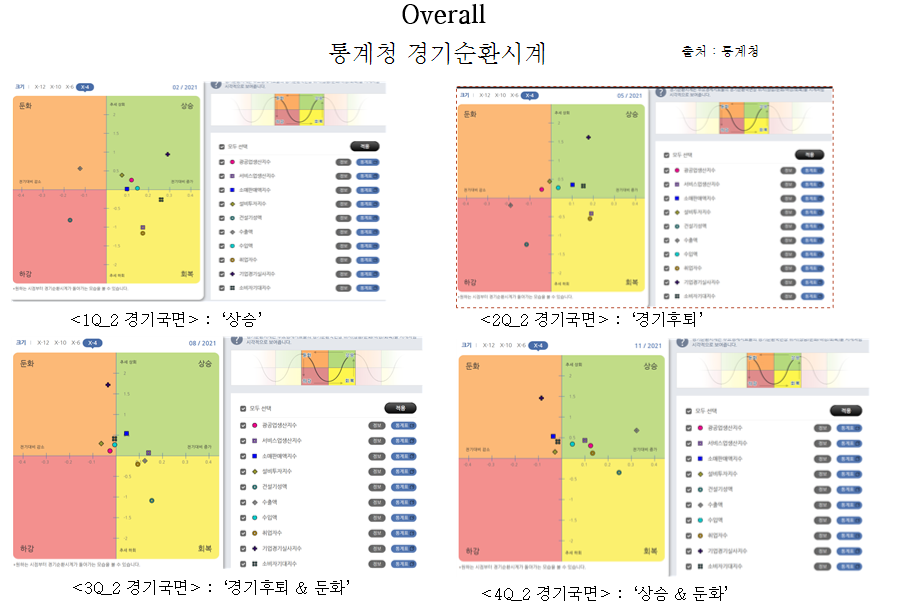

### 1_2Q

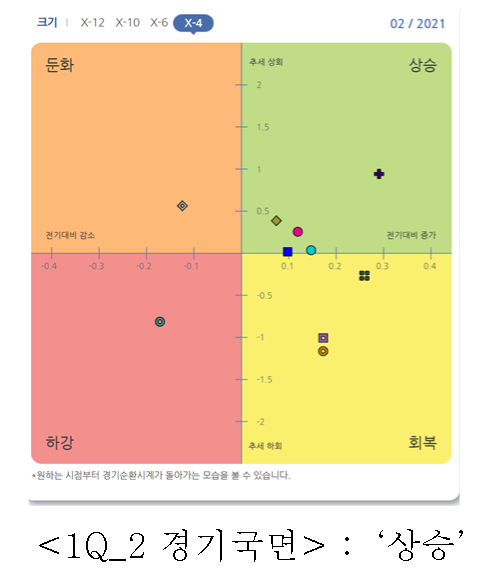

#### NLP방식 

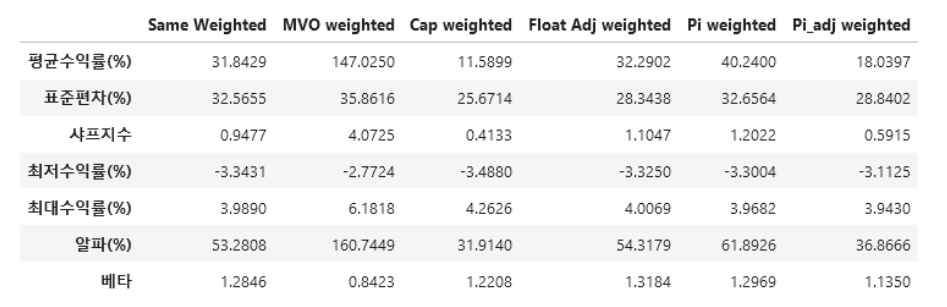

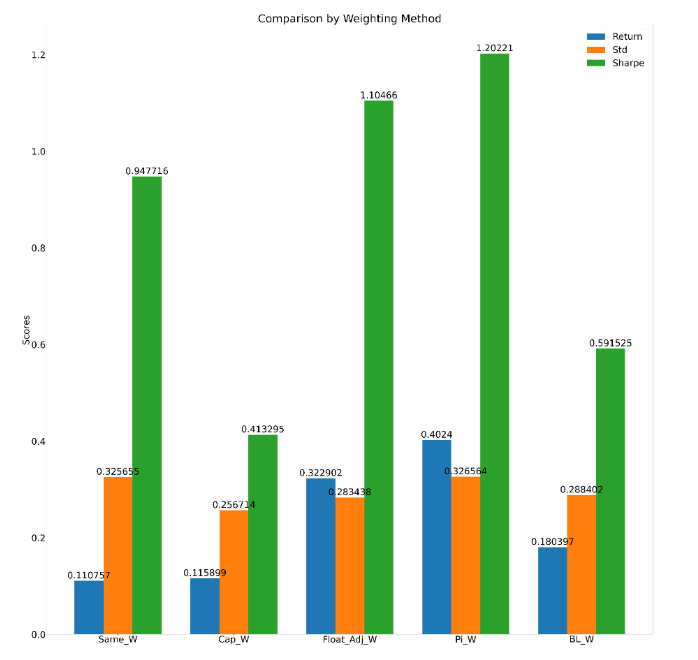




#### CONV1D +LSTM 

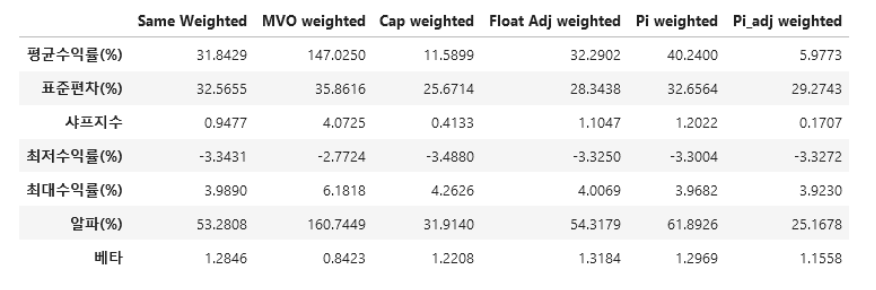

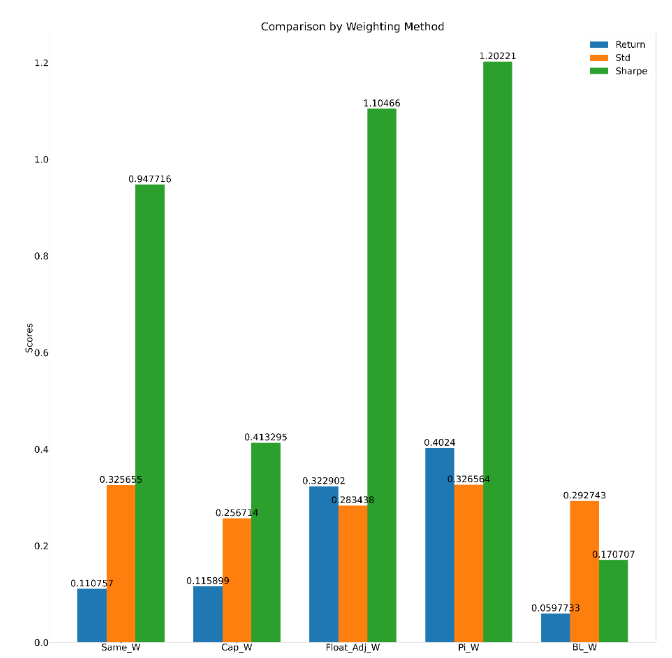


### 2Q_2 

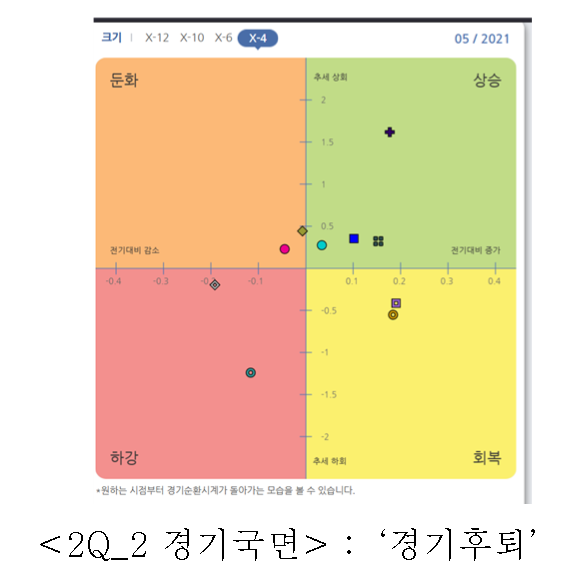

#### NLP 

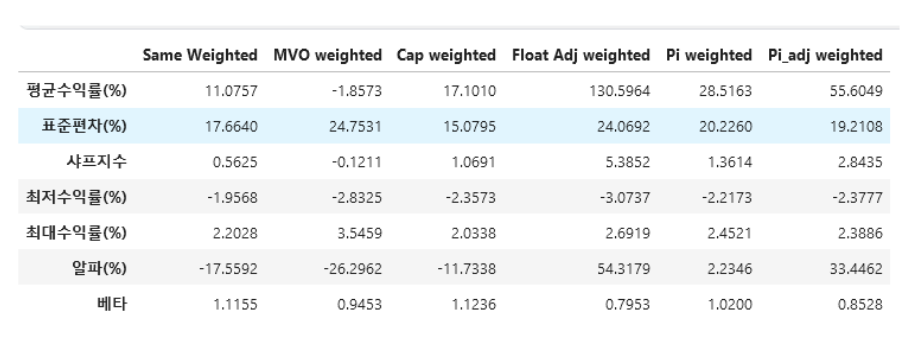

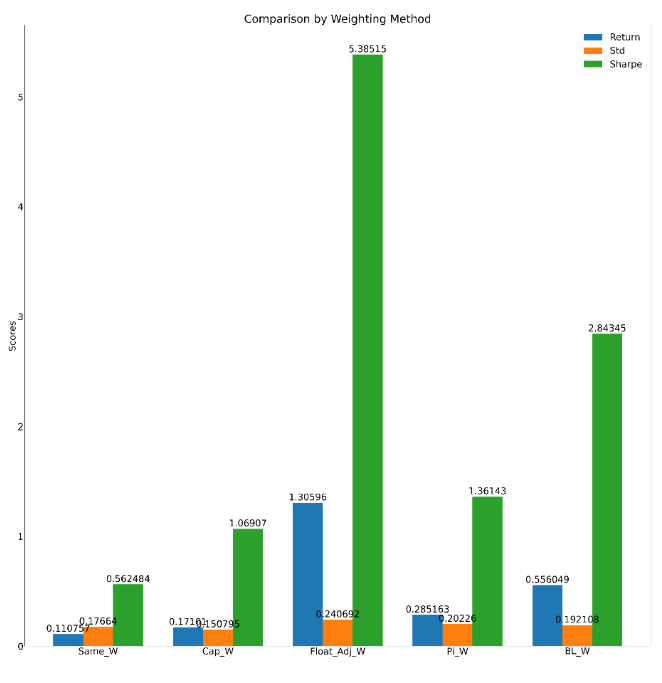

#### CONV1D+LSTM 

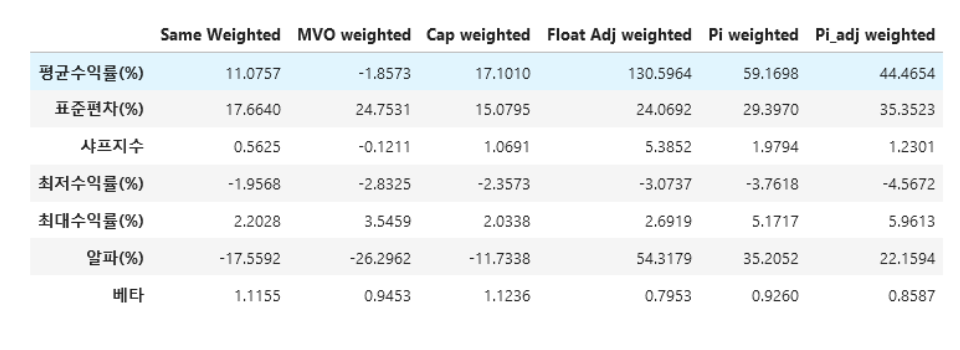

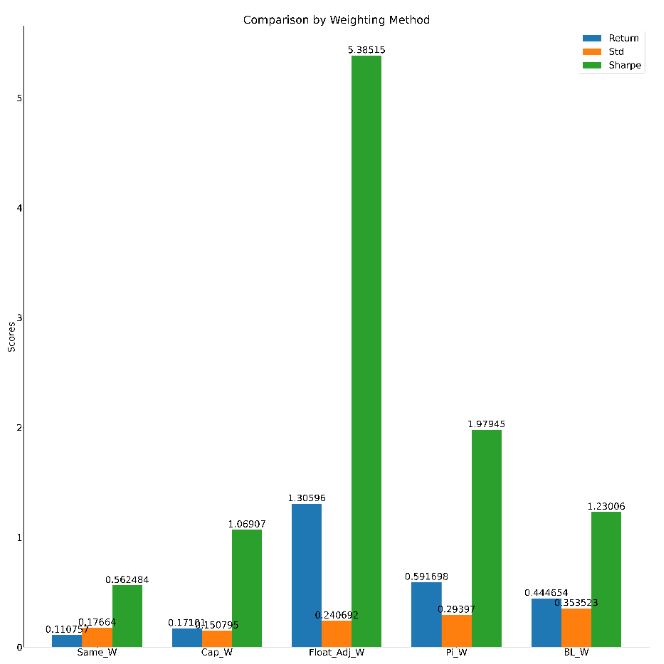

### 3Q_2 

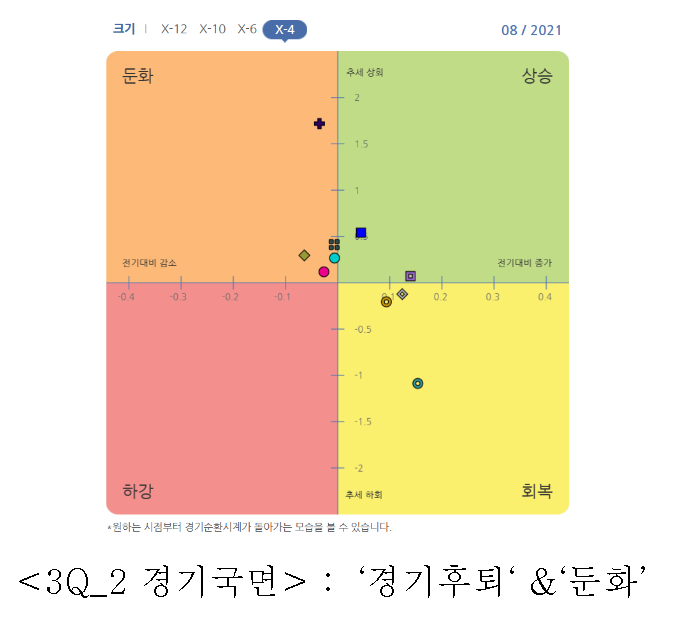


#### NLP 

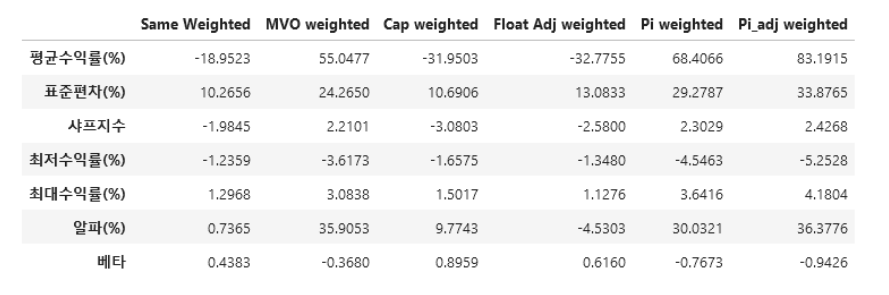

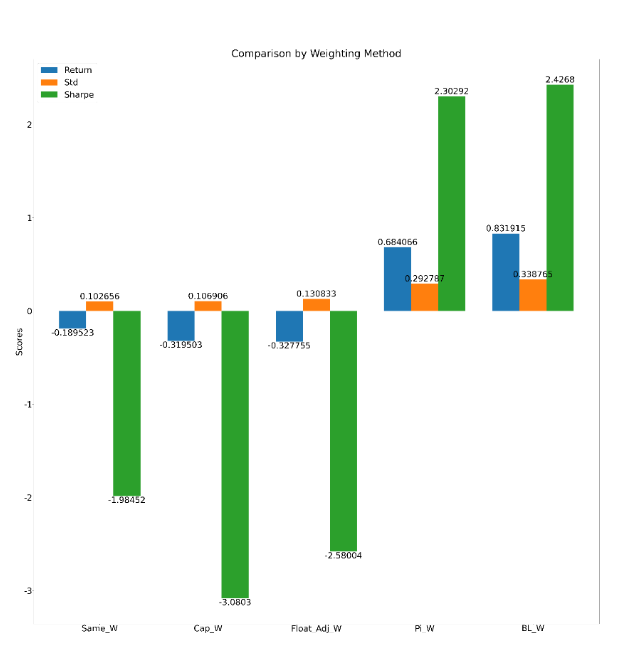

#### CONV1D+LSTM 

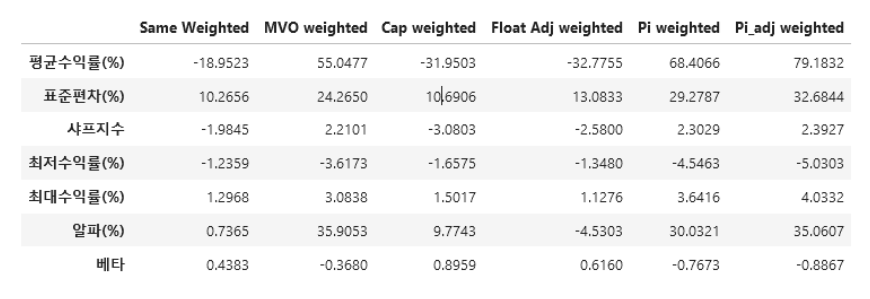

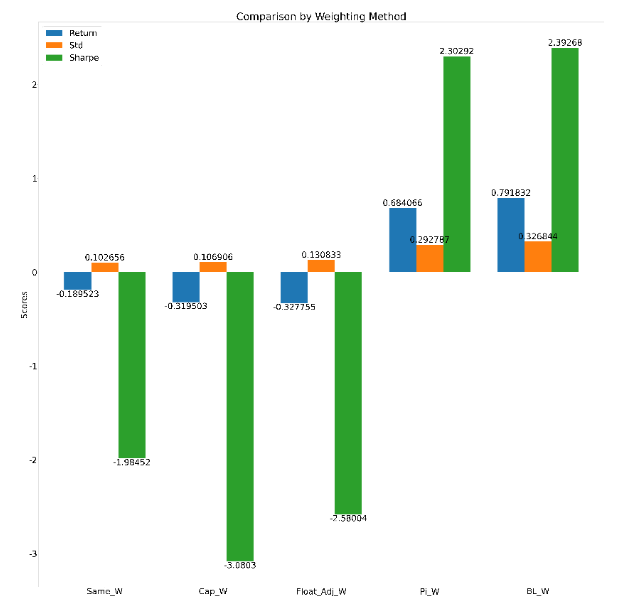

### 4Q_2 

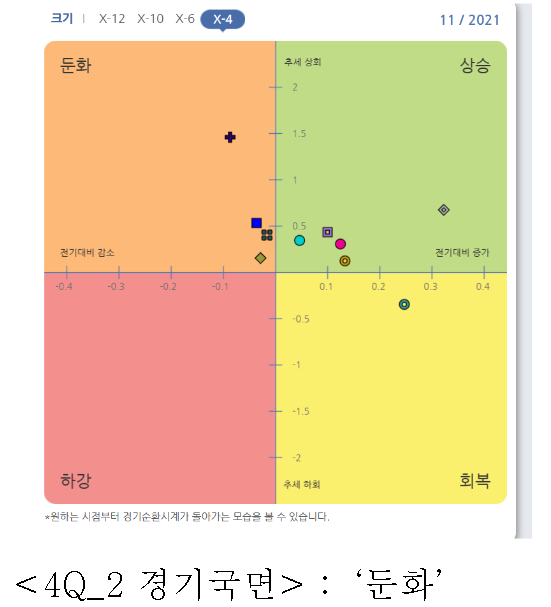

#### NLP 

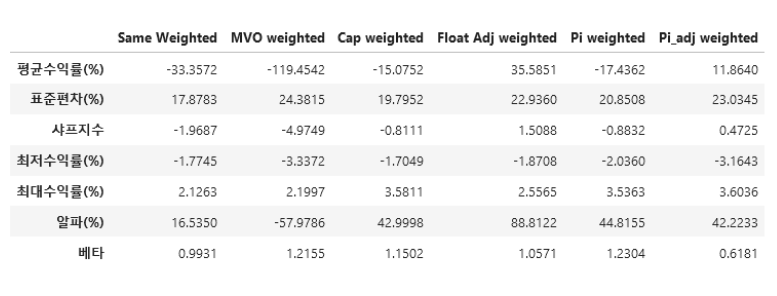

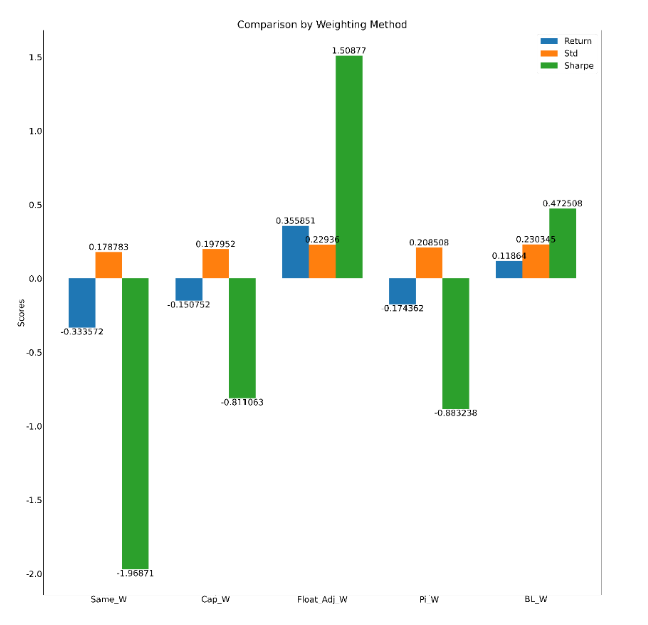

#### CONV1D+LSTM 

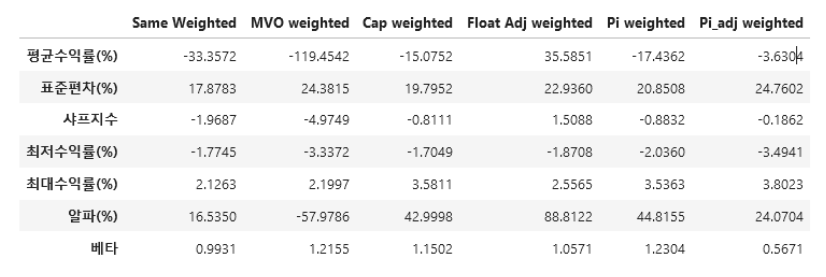

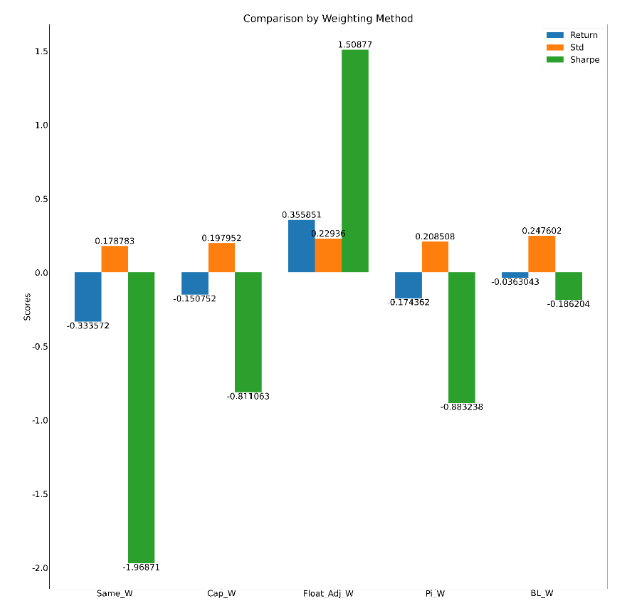

# Overall 

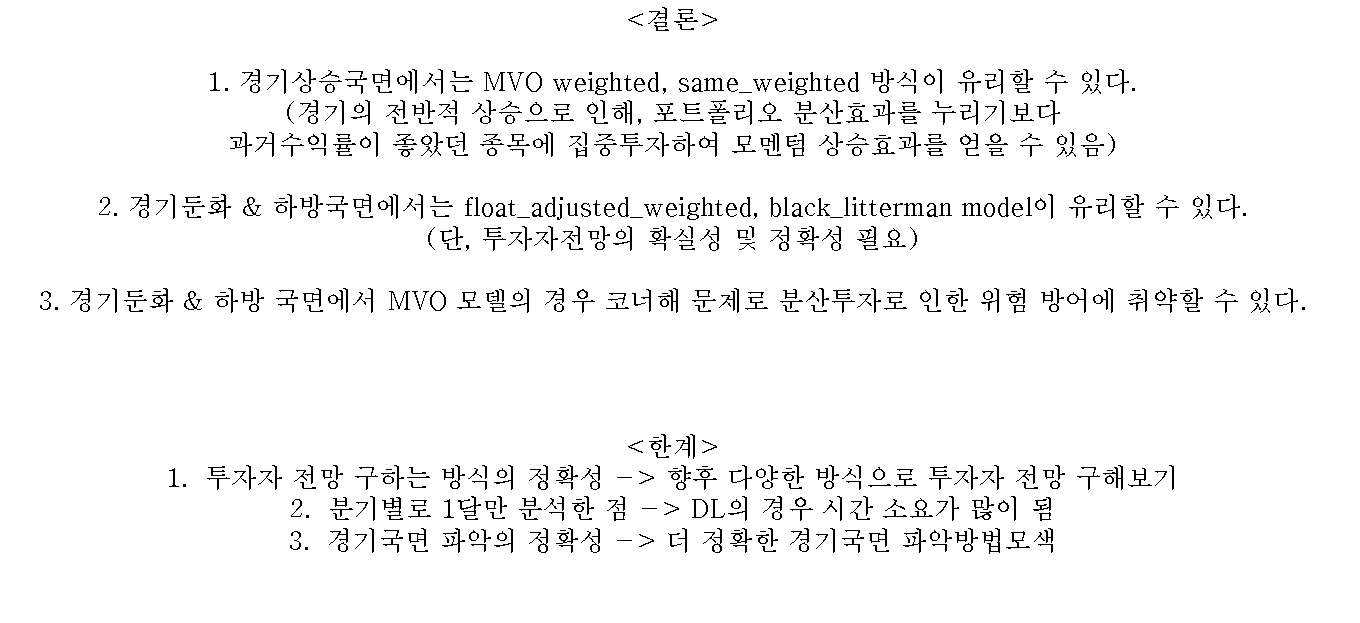